In [1]:
import tensorflow as tf
import numpy as np
import datetime
np.random.seed(0)

from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

# Blobs
We now create a toy dataset with two classes that are easily distinguishable.

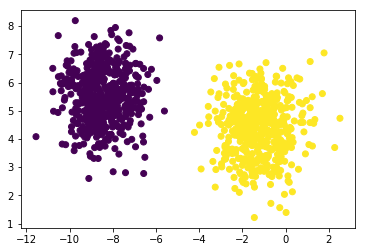

In [2]:
X, Y = datasets.make_blobs(n_samples=1000, n_features=2, centers=2, random_state=7)
plt.scatter(*X.T, c=Y)

Fill in the following function to partition the data into a training set and a test set. You should shuffle the dataset before splitting it.

In [3]:
def train_test_split(X, Y, split_ratio):
    split_point = int(X.shape[0]*split_ratio)

    perm_indices = np.random.permutation(X.shape[0])
    perm_indices_train = perm_indices[:split_point]
    perm_indices_test = perm_indices[split_point:]

    X_train, Y_train = X[perm_indices_train], Y[perm_indices_train]
    X_test, Y_test = X[perm_indices_test], Y[perm_indices_test]
    
    return X_train, Y_train, X_test, Y_test

In [4]:
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, split_ratio=0.8)

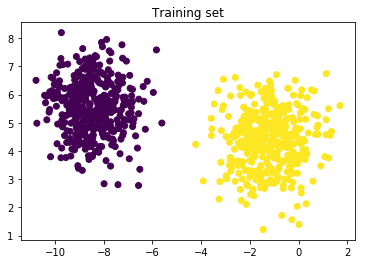

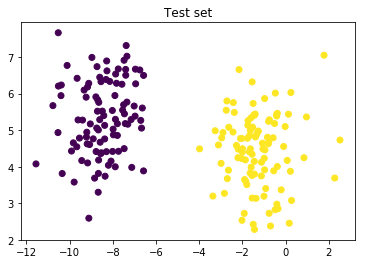

In [5]:
plt.figure()
plt.title('Training set')
plt.scatter(*X_train.T, c=Y_train)

plt.figure()
plt.title('Test set')
plt.scatter(*X_test.T, c=Y_test)

# Logistic regression
Write your TensorFlow code to perform (linear) logistic regression.

In [6]:
tf.reset_default_graph()

# X_in and Y_in are filled at runtime
X_in = tf.placeholder(tf.float32, [None, 2], name='X')
Y_in = tf.placeholder(tf.float32, [None, 1], name='Y')

# These are learnable parameters. We randomly initialize W from a Gaussian distribution.
W = tf.Variable(tf.random.normal([2, 1], stddev=0.01), name='W')
b = tf.Variable(tf.zeros([1]), name='b')

logits = tf.matmul(X_in, W) + b
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y_in))

accuracy = tf.reduce_mean(tf.cast(tf.equal(logits > 0, tf.cast(Y_in, tf.bool)), tf.float32))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
session = tf.Session()
session.run(init)

summary_writer = tf.summary.FileWriter('train/linear_blobs', session.graph)

tf.summary.scalar(name='train_loss', tensor=loss)
tf.summary.scalar(name='train_accuracy', tensor=accuracy)

summary_op = tf.summary.merge_all()

# Run for 1000 epochs
for epoch in range(1000):
    _, loss_value, accuracy_value, summary_str = session.run([train_op, loss, accuracy, summary_op],
                                                feed_dict={X_in: X_train, Y_in: Y_train[:, np.newaxis]})
    summary_writer.add_summary(summary_str, epoch)
    if (epoch+1) % 100 == 0:
        print('[Epoch {}] loss: {} - train accuracy: {}'.format(epoch+1, loss_value, accuracy_value))

print("Final W: {}".format(session.run(W)))
print("Final b: {}".format(session.run(b)))

[Epoch 100] loss: 0.0647495537996 - train accuracy: 0.987500011921
[Epoch 200] loss: 0.0473239533603 - train accuracy: 0.990000009537
[Epoch 300] loss: 0.0403139926493 - train accuracy: 0.991249978542
[Epoch 400] loss: 0.0363033786416 - train accuracy: 0.992500007153
[Epoch 500] loss: 0.0336122252047 - train accuracy: 0.993749976158
[Epoch 600] loss: 0.0316321514547 - train accuracy: 0.993749976158
[Epoch 700] loss: 0.0300849955529 - train accuracy: 0.993749976158
[Epoch 800] loss: 0.0288239717484 - train accuracy: 0.993749976158
[Epoch 900] loss: 0.027763646096 - train accuracy: 0.993749976158
[Epoch 1000] loss: 0.0268505960703 - train accuracy: 0.993749976158
Final W: [[2.2199805]
 [1.7933166]]
Final b: [1.4429964]


In [11]:
accuracy_value = session.run([accuracy], feed_dict={X_in: X_test, Y_in: Y_test[:, np.newaxis]})
print('Test accuracy: {}'.format(accuracy_value))

Test accuracy: [0.995]


In [9]:
def sample_grid(data, resolution=100):
    x = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), resolution)
    y = np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), resolution)
    X, Y = np.meshgrid(x, y)
    output = np.stack((X, Y), axis=2)
    return output

To plot the decision boundary, we provide a function to generate an evenly-spaced grid. Your goal here is to classify each point of the grid.

In [10]:
grid = sample_grid(X)
grid_flattened = grid.reshape(-1, 2)

predictions = session.run([tf.nn.sigmoid(logits)], feed_dict={X_in: grid_flattened})[0]

predictions = predictions.reshape(grid.shape[0], grid.shape[1])

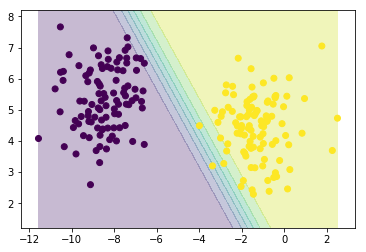

In [11]:
plt.contourf(grid[:, :, 0], grid[:, :, 1], predictions, alpha=0.3)
plt.scatter(*X_test.T, c=Y_test)

In [12]:
# Clean-up
session.close()

*A simple linear model works very well in this case, since the data is linearly separable.*

# Circles
We now switch to a (slightly) more complicated dataset.

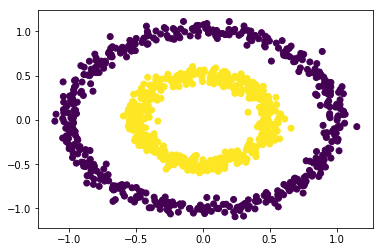

In [13]:
X, Y = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)
plt.scatter(*X.T, c=Y)

In [14]:
# Split the dataset
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, split_ratio=0.8)

Now train the same model as before on the new dataset

In [15]:
tf.reset_default_graph()

# X_in and Y_in are filled at runtime
X_in = tf.placeholder(tf.float32, [None, 2], name='X')
Y_in = tf.placeholder(tf.float32, [None, 1], name='Y')

# These are learnable parameters. We randomly initialize W from a Gaussian distribution.
W = tf.Variable(tf.random.normal([2, 1], stddev=0.01), name='W')
b = tf.Variable(tf.zeros([1]), name='b')

logits = tf.matmul(X_in, W) + b
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y_in))

accuracy = tf.reduce_mean(tf.cast(tf.equal(logits > 0, tf.cast(Y_in, tf.bool)), tf.float32))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [16]:
session = tf.Session()
session.run(init)

summary_writer = tf.summary.FileWriter('train/linear_circles', session.graph)

tf.summary.scalar(name='train_loss', tensor=loss)
tf.summary.scalar(name='train_accuracy', tensor=accuracy)

summary_op = tf.summary.merge_all()

# Run for 1000 epochs
for epoch in range(1000):
    _, loss_value, accuracy_value, summary_str = session.run([train_op, loss, accuracy, summary_op],
                                                feed_dict={X_in: X_train, Y_in: Y_train[:, np.newaxis]})
    summary_writer.add_summary(summary_str, epoch)
    if (epoch+1) % 100 == 0:
        print('[Epoch {}] loss: {} - train accuracy: {}'.format(epoch+1, loss_value, accuracy_value))

print("Final W: {}".format(session.run(W)))
print("Final b: {}".format(session.run(b)))

[Epoch 100] loss: 0.6929295063018799 - train accuracy: 0.5899999737739563
[Epoch 200] loss: 0.692910373210907 - train accuracy: 0.5662500262260437
[Epoch 300] loss: 0.6929064989089966 - train accuracy: 0.5674999952316284
[Epoch 400] loss: 0.692905604839325 - train accuracy: 0.5612499713897705
[Epoch 500] loss: 0.6929054856300354 - train accuracy: 0.5637500286102295
[Epoch 600] loss: 0.6929054260253906 - train accuracy: 0.5637500286102295
[Epoch 700] loss: 0.6929054260253906 - train accuracy: 0.5649999976158142
[Epoch 800] loss: 0.6929054260253906 - train accuracy: 0.5637500286102295
[Epoch 900] loss: 0.6929054260253906 - train accuracy: 0.5637500286102295
[Epoch 1000] loss: 0.6929054260253906 - train accuracy: 0.5637500286102295
Final W: [[-0.01417786]
 [ 0.06861269]]
Final b: [0.01998054]


In [17]:
accuracy_value = session.run([accuracy], feed_dict={X_in: X_test, Y_in: Y_test[:, np.newaxis]})
print('Test accuracy: {}'.format(accuracy_value))

Test accuracy: [0.515]


...and plot the decision boundary:

In [18]:
grid = sample_grid(X)
grid_flattened = grid.reshape(-1, 2)

predictions = session.run([tf.nn.sigmoid(logits)], feed_dict={X_in: grid_flattened})[0]

predictions = predictions.reshape(grid.shape[0], grid.shape[1])

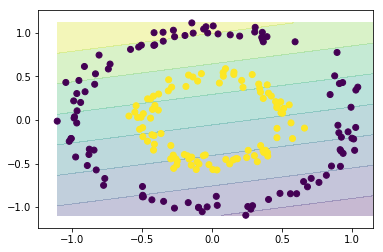

In [19]:
plt.contourf(grid[:, :, 0], grid[:, :, 1], predictions, alpha=0.3)
plt.scatter(*X_test.T, c=Y_test)

In [20]:
# Clean-up
session.close()

Does it work? *No, because the data is not linearly separable.*

# Non-linear classification with a neural network
Add a hidden layer to your previous model and train it again.
You should also experiment with different numbers of neurons in the hidden layer, as well as different activation functions (we suggest trying at least sigmoid and ReLU).

In [21]:
tf.reset_default_graph()

# X_in and Y_in are filled at runtime
X_in = tf.placeholder(tf.float32, [None, 2], name='X')
Y_in = tf.placeholder(tf.float32, [None, 1], name='Y')

# Hidden layer
W1 = tf.Variable(tf.random.normal([2, 100], stddev=0.01), name='W1')
b1 = tf.Variable(tf.zeros([100]), name='b1')

# Output layer
W2 = tf.Variable(tf.random.normal([100, 1], stddev=0.01), name='W2')
b2 = tf.Variable(tf.zeros([1]), name='b2')

hidden = tf.nn.relu(tf.matmul(X_in, W1) + b1)
logits = tf.matmul(hidden, W2) + b2
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y_in))

accuracy = tf.reduce_mean(tf.cast(tf.equal(logits > 0, tf.cast(Y_in, tf.bool)), tf.float32))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [22]:
session = tf.Session()
session.run(init)

summary_writer = tf.summary.FileWriter('train/nn_circles', session.graph)

tf.summary.scalar(name='train_loss', tensor=loss)
tf.summary.scalar(name='train_accuracy', tensor=accuracy)

summary_op = tf.summary.merge_all()

# Run for 1000 epochs
for epoch in range(1000):
    _, loss_value, accuracy_value, summary_str = session.run([train_op, loss, accuracy, summary_op],
                                                feed_dict={X_in: X_train, Y_in: Y_train[:, np.newaxis]})
    summary_writer.add_summary(summary_str, epoch)
    if (epoch+1) % 100 == 0:
        print('[Epoch {}] loss: {} - train accuracy: {}'.format(epoch+1, loss_value, accuracy_value))

[Epoch 100] loss: 0.6926386952400208 - train accuracy: 0.5049999952316284
[Epoch 200] loss: 0.6918814778327942 - train accuracy: 0.5049999952316284
[Epoch 300] loss: 0.6903091669082642 - train accuracy: 0.5049999952316284
[Epoch 400] loss: 0.6868922710418701 - train accuracy: 0.7862499952316284
[Epoch 500] loss: 0.6795552968978882 - train accuracy: 0.9100000262260437
[Epoch 600] loss: 0.6645259261131287 - train accuracy: 0.956250011920929
[Epoch 700] loss: 0.6362951397895813 - train accuracy: 0.9850000143051147
[Epoch 800] loss: 0.5897212028503418 - train accuracy: 0.9950000047683716
[Epoch 900] loss: 0.5242154598236084 - train accuracy: 0.9987499713897705
[Epoch 1000] loss: 0.44581642746925354 - train accuracy: 1.0


In [23]:
accuracy_value = session.run([accuracy], feed_dict={X_in: X_test, Y_in: Y_test[:, np.newaxis]})
print('Test accuracy: {}'.format(accuracy_value))

Test accuracy: [1.0]


Plot the decision boundary. Does it work?

In [24]:
grid = sample_grid(X)
grid_flattened = grid.reshape(-1, 2)

predictions = session.run([tf.nn.sigmoid(logits)], feed_dict={X_in: grid_flattened})[0]

predictions = predictions.reshape(grid.shape[0], grid.shape[1])

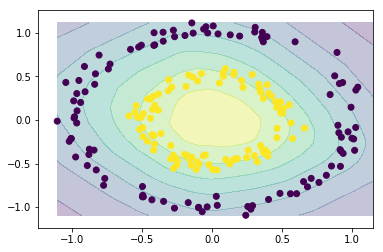

In [25]:
plt.contourf(grid[:, :, 0], grid[:, :, 1], predictions, alpha=0.3)
plt.scatter(*X_test.T, c=Y_test)

In [26]:
# Clean-up
session.close()

*It works, since non-linearities can model arbitrary data distributions.*

# Stochastic gradient descent
In the previous experiments, you instructed TensorFlow to compute the gradient across the full dataset. Most neural network approaches train using *mini-batches*, i.e. small subsets of the training set.

Rewrite the previous training code to perform stochastic gradient descent (SGD) instead of batch gradient descent. Try various batch sizes (e.g. 16, 32, 64) and see how the loss evolves.

What are the advantages of SGD over batch GD? What are some potential drawbacks?

In [12]:
tf.reset_default_graph()

# X_in and Y_in are filled at runtime
X_in = tf.placeholder(tf.float32, [None, 2], name='X')
Y_in = tf.placeholder(tf.float32, [None, 1], name='Y')

# Hidden layer
W1 = tf.Variable(tf.random.normal([2, 100], stddev=0.01), name='W1')
b1 = tf.Variable(tf.zeros([100]), name='b1')

# Output layer
W2 = tf.Variable(tf.random.normal([100, 1], stddev=0.01), name='W2')
b2 = tf.Variable(tf.zeros([1]), name='b2')

hidden = tf.nn.relu(tf.matmul(X_in, W1) + b1)
logits = tf.matmul(hidden, W2) + b2
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y_in))

accuracy = tf.reduce_mean(tf.cast(tf.equal(logits > 0, tf.cast(Y_in, tf.bool)), tf.float32))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [13]:
session = tf.Session()
session.run(init)

batch_size = 64

summary_writer = tf.summary.FileWriter('train/nn_circles_sgd', session.graph)

tf.summary.scalar(name='train_loss', tensor=loss)
tf.summary.scalar(name='train_accuracy', tensor=accuracy)

summary_op = tf.summary.merge_all()
    
# Run for 300 epochs
iteration = 0
for epoch in range(300):
    perm_indices = np.random.permutation(X_train.shape[0])
    
    index = 0
    
    total_accuracy = 0
    total_loss = 0
    N_batches = 0
    while index < X_train.shape[0]:
        X_batch = X_train[index:index+batch_size]
        Y_batch = Y_train[index:index+batch_size]
        index += batch_size
        
        _, loss_value, accuracy_value, summary_str = session.run([train_op, loss, accuracy, summary_op],
                                                    feed_dict={X_in: X_batch, Y_in: Y_batch[:, np.newaxis]})
        summary_writer.add_summary(summary_str, iteration)
        total_loss += loss_value
        total_accuracy += accuracy_value
        N_batches += 1
        iteration += 1
        
    total_loss /= N_batches
    total_accuracy /= N_batches
        
    if (epoch+1) % 10 == 0:
        print('[Epoch {}] loss: {} - train accuracy: {}'.format(epoch+1, total_loss, total_accuracy))

[Epoch 10] loss: 0.0380861287793 - train accuracy: 0.993990384615
[Epoch 20] loss: 0.0245824634599 - train accuracy: 0.993990384615
[Epoch 30] loss: 0.0206086664604 - train accuracy: 0.993990384615
[Epoch 40] loss: 0.018313866431 - train accuracy: 0.993990384615
[Epoch 50] loss: 0.016641957757 - train accuracy: 0.993990384615
[Epoch 60] loss: 0.0152896955215 - train accuracy: 0.993990384615
[Epoch 70] loss: 0.014135352712 - train accuracy: 0.995192307692
[Epoch 80] loss: 0.0131191956864 - train accuracy: 0.996394230769
[Epoch 90] loss: 0.0122075469967 - train accuracy: 0.996394230769
[Epoch 100] loss: 0.011379635857 - train accuracy: 0.996394230769
[Epoch 110] loss: 0.0106217862922 - train accuracy: 0.996394230769
[Epoch 120] loss: 0.0099243903264 - train accuracy: 0.996394230769
[Epoch 130] loss: 0.00928049771867 - train accuracy: 0.996394230769
[Epoch 140] loss: 0.00868470615331 - train accuracy: 0.996394230769
[Epoch 150] loss: 0.00813296464576 - train accuracy: 0.997596153846
[Epoc

In [14]:
accuracy_value = session.run([accuracy], feed_dict={X_in: X_test, Y_in: Y_test[:, np.newaxis]})
print('Test accuracy: {}'.format(accuracy_value))

Test accuracy: [1.0]


In [15]:
grid = sample_grid(X)
grid_flattened = grid.reshape(-1, 2)

predictions = session.run([tf.nn.sigmoid(logits)], feed_dict={X_in: grid_flattened})[0]

predictions = predictions.reshape(grid.shape[0], grid.shape[1])

NameError: name 'sample_grid' is not defined

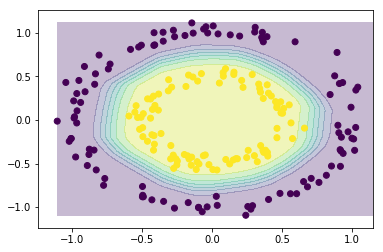

In [31]:
plt.contourf(grid[:, :, 0], grid[:, :, 1], predictions, alpha=0.3)
plt.scatter(*X_test.T, c=Y_test)

In [32]:
# Clean-up
session.close()

*We can observe that SGD converges to a better solution in fewer epochs, and that the decision boundary is sharper.
SGD converges much faster than batch GD because it exploits the redundancy of the data. Moreover, the gradient noise allows the optimizer to escape sharp local minima and converge to wider minima (which has an implicit regularization effect).*

*A drawback of SGD is that it reduces parallelism (which can be a problem for GPUs), but this can be tackled by using sufficiently large minibatches.*